<a href="https://colab.research.google.com/github/Khaled2099/House-Price-Prediction-Project/blob/main/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/Airline_Delay_Cause.csv")

In [10]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65648,2019,2,MQ,Envoy Air,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",72.0,15.0,3.79,0.84,...,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0
65649,2019,2,MQ,Envoy Air,BTR,"Baton Rouge, LA: Baton Rouge Metropolitan/Ryan...",13.0,5.0,0.00,0.26,...,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0
65650,2019,2,MQ,Envoy Air,BUF,"Buffalo, NY: Buffalo Niagara International",93.0,24.0,5.41,1.11,...,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0
65651,2019,2,MQ,Envoy Air,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",91.0,17.0,3.14,0.77,...,0.0,6.05,8.0,0.0,1070.0,208.0,103.0,382.0,0.0,377.0


In [16]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,65653.000000,65653.000000,65527.000000,65344.000000,65527.000000,65525.000000,65527.000000,65527.000000,65527.000000,65526.000000,65524.000000,65524.000000,65526.000000,65526.000000,65526.000000,65526.000000,65526.000000
mean,2020.283064,6.246569,304.539839,49.100162,16.861550,1.863116,13.841011,0.157734,16.239670,8.833227,0.681323,3270.236585,1209.705628,197.053475,660.294005,7.256921,1195.833181
std,1.010241,3.414947,868.195175,144.614701,45.283988,6.655643,49.557775,0.760022,54.349598,60.086937,3.148407,10591.986044,3815.991295,801.099289,2794.810706,42.356581,4162.597347
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,36.000000,4.000000,1.530000,0.000000,0.450000,0.000000,0.670000,0.000000,0.000000,212.000000,69.000000,0.000000,15.000000,0.000000,20.000000
50%,2020.000000,6.000000,85.000000,12.000000,4.740000,0.080000,2.580000,0.000000,3.000000,1.000000,0.000000,717.000000,267.000000,5.000000,94.000000,0.000000,189.000000
75%,2021.000000,9.000000,204.000000,33.000000,13.000000,1.450000,8.010000,0.000000,10.000000,4.000000,0.000000,2104.000000,864.000000,115.000000,321.000000,0.000000,724.000000
max,2022.000000,12.000000,21873.000000,3714.000000,1147.000000,226.000000,1485.820000,41.970000,1531.810000,4951.000000,154.000000,329847.000000,111645.000000,27876.000000,97283.000000,3760.000000,143192.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65653 entries, 0 to 65652
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 65653 non-null  int64  
 1   month                65653 non-null  int64  
 2   carrier              65653 non-null  object 
 3   carrier_name         65653 non-null  object 
 4   airport              65650 non-null  object 
 5   airport_name         65653 non-null  object 
 6   arr_flights          65527 non-null  float64
 7   arr_del15            65344 non-null  float64
 8   carrier_ct           65527 non-null  float64
 9   weather_ct           65525 non-null  float64
 10  nas_ct               65527 non-null  float64
 11  security_ct          65527 non-null  float64
 12  late_aircraft_ct     65527 non-null  float64
 13  arr_cancelled        65526 non-null  float64
 14  arr_diverted         65524 non-null  float64
 15  arr_delay            65524 non-null 

In [15]:
total = data.isnull().sum().sort_values(ascending = False)
precent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
messing_data = pd.concat([total,precent], axis=1, keys=['Total','Precent'])
messing_data.head(20)

,Total,Precent
arr_del15,309,0.004707
arr_delay,129,0.001965
arr_diverted,129,0.001965
weather_ct,128,0.001950
late_aircraft_delay,127,0.001934
security_delay,127,0.001934
nas_delay,127,0.001934
weather_delay,127,0.001934
carrier_delay,127,0.001934
arr_cancelled,127,0.001934


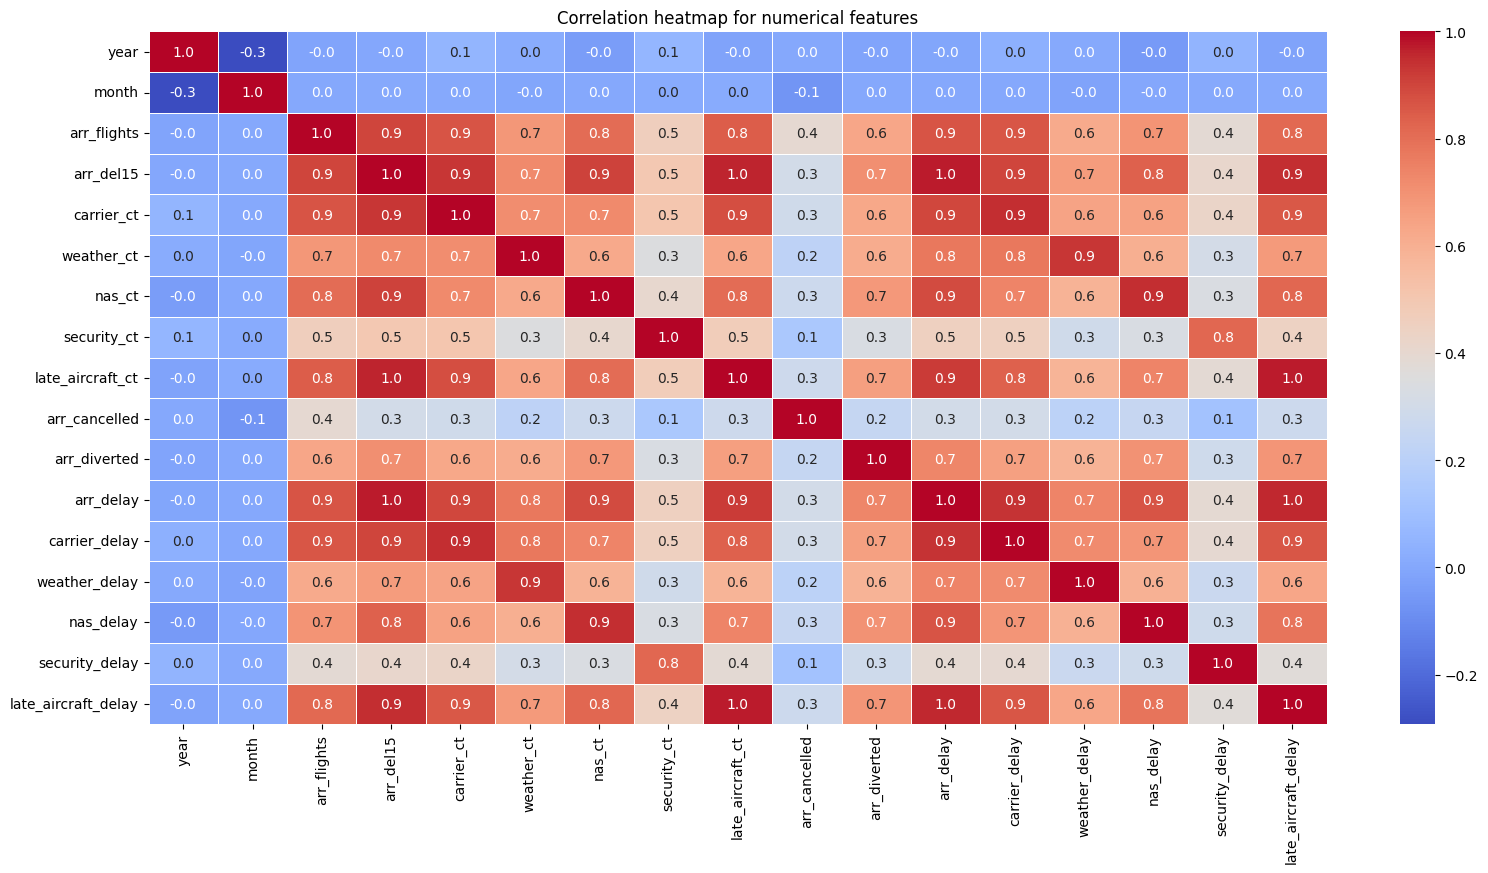

In [19]:
fig , ax = plt.subplots(figsize=(19,9))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot=True , cmap='coolwarm' , fmt='.1f' , linewidth=.6)
plt.title('Correlation heatmap for numerical features')
plt.show()


In [20]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)

In [21]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65337 entries, 0 to 65651
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 65337 non-null  int64  
 1   month                65337 non-null  int64  
 2   arr_flights          65337 non-null  float64
 3   arr_del15            65337 non-null  float64
 4   carrier_ct           65337 non-null  float64
 5   weather_ct           65337 non-null  float64
 6   nas_ct               65337 non-null  float64
 7   security_ct          65337 non-null  float64
 8   late_aircraft_ct     65337 non-null  float64
 9   arr_cancelled        65337 non-null  float64
 10  arr_diverted         65337 non-null  float64
 11  arr_delay            65337 non-null  float64
 12  carrier_delay        65337 non-null  float64
 13  weather_delay        65337 non-null  float64
 14  nas_delay            65337 non-null  float64
 15  security_delay       65337 non-null  floa

In [23]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 27876.0)

In [25]:
#Applaying Binary Classification for our O/P "weather_delay"

data['Weather_delay_new'] = data['weather_delay'].apply(lambda x : 1 if x > 100 else 0) # new column

In [26]:
data['Weather_delay_new'].value_counts()

Weather_delay_new
0    47809
1    17528
Name: count, dtype: int64

In [27]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Weather_delay_new
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65647,2019,2,56.0,9.0,2.97,0.00,2.03,0.0,4.00,7.0,0.0,573.0,128.0,0.0,124.0,0.0,321.0,0
65648,2019,2,72.0,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0,0
65649,2019,2,13.0,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0,0
65650,2019,2,93.0,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0,1


In [28]:
# Splitting the data

X = data.drop(['Weather_delay_new'] , axis=1 )
y = data['Weather_delay_new']

In [29]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65647,2019,2,56.0,9.0,2.97,0.00,2.03,0.0,4.00,7.0,0.0,573.0,128.0,0.0,124.0,0.0,321.0
65648,2019,2,72.0,15.0,3.79,0.84,6.58,0.0,3.79,4.0,2.0,637.0,216.0,16.0,267.0,0.0,138.0
65649,2019,2,13.0,5.0,0.00,0.26,1.73,0.0,3.00,0.0,0.0,148.0,0.0,14.0,63.0,0.0,71.0
65650,2019,2,93.0,24.0,5.41,1.11,4.78,0.0,12.70,5.0,1.0,1630.0,279.0,137.0,227.0,0.0,987.0


In [31]:
y

0        0
1        0
2        0
3        0
4        0
        ..
65647    0
65648    0
65649    0
65650    1
65651    1
Name: Weather_delay_new, Length: 65337, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train ,y_test = train_test_split(X , y , test_size=0.2 , random_state=44 , shuffle=True )

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (52269, 17)
X_test shape is  (13068, 17)
y_train shape is  (52269,)
y_test shape is  (13068,)


In [36]:
import tensorflow as tf
import keras

In [37]:
model = keras.models.Sequential([

                # keras.layers.Input(shape=(17)),
            keras.layers.Dense(8,  activation = 'tanh'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'sigmoid'),
            # keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation = 'tanh'),
            keras.layers.Dense(32, activation = 'tanh'),
            #keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid')


])

# Dropout haben between 2 layers if there is Overfitting
# it's better to make no.of layers like this : 2,4,8,16,32,64,128,256,512

In [38]:
MyOptimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW")

In [39]:
model.compile(optimizer =MyOptimizer,loss='binary_crossentropy',metrics=['accuracy']) # matrix

In [57]:
history = model.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=1000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,                          # wait 10 epochs to say that accuracy reduces
                                            monitor='val_accuracy',#"val_loss",   # look at the accuracy of validation
                                            restore_best_weights=True)])


Epoch 1/100
53/53 [==============================] - 1s 12ms/step - loss: 0.0218 - accuracy: 0.9956 - val_loss: 0.0165 - val_accuracy: 0.9966
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 0.9957 - val_loss: 0.0203 - val_accuracy: 0.9966
Epoch 3/100
53/53 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.9961 - val_loss: 0.0132 - val_accuracy: 0.9979
Epoch 4/100
53/53 [==============================] - 0s 8ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0169 - val_accuracy: 0.9964
Epoch 5/100
53/53 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0219 - val_accuracy: 0.9957
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 0.0166 - accuracy: 0.9965 - val_loss: 0.0153 - val_accuracy: 0.9959
Epoch 7/100
53/53 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.9979 - val_loss: 0.0092 - val_accuracy: 0.9983
Epoch 8/100


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11665 (45.57 KB)
Trainable params: 11665 (45.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.save('KerasModel.model')

In [60]:
NewKerasModel = keras.models.load_model('KerasModel.model')

In [61]:
y_pred = model.predict(X_test)

409/409 [==============================] - 1s 2ms/step


In [62]:
print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (13068, 1)


In [63]:
print('Prediction items are {}'.format(y_pred[:5]))

Prediction items are [[7.4703747e-04]
 [7.4703747e-04]
 [9.9993271e-01]
 [9.9993163e-01]
 [9.9993163e-01]]


In [64]:
y_test[:5]

48234    0
51716    0
55367    1
11442    1
18651    1
Name: Weather_delay_new, dtype: int64

In [65]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

409/409 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9992
Model Loss is 0.005877492018043995
Model Accuracy is 0.9991582632064819


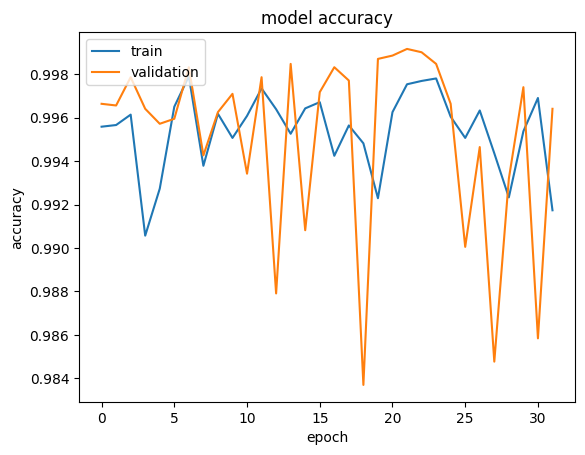

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

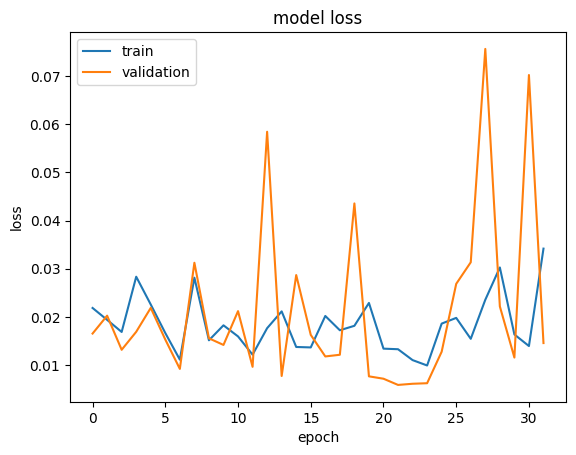

In [67]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [68]:
len(y_test), len(y_pred)


(13068, 13068)

In [69]:
y_pred

array([[7.4703747e-04],
       [7.4703747e-04],
       [9.9993271e-01],
       ...,
       [9.9993199e-01],
       [7.4703747e-04],
       [9.9993271e-01]], dtype=float32)

In [70]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0

In [71]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[9555    2]
 [   9 3502]]


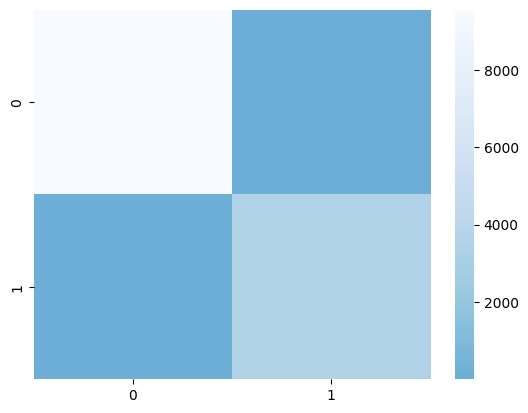

In [72]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()


In [73]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )


Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9557
           1       1.00      1.00      1.00      3511

    accuracy                           1.00     13068
   macro avg       1.00      1.00      1.00     13068
weighted avg       1.00      1.00      1.00     13068

